In [1]:
from IPython.core.display import HTML
css_file = './numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
def plot(v1, v2, xlabl, ylabl, title):
    ''' a function for plots
    
    Parameters
    ----------
    v1: x-axis vector
    v2: y-axis vector
    xlabl: label for x-axis values
    ylabl: label for y-axis values
    title: plot title
    
    Return:
    -------
    Plot!
    '''
    #
    pyplot.figure(figsize=(8,8))
    pyplot.grid(True)
    #
    pyplot.xlabel(xlabl, fontsize=18)
    pyplot.ylabel(ylabl, fontsize=18)
    #
    pyplot.tick_params(axis='x', pad=10)
    pyplot.tick_params(axis='y', pad=10)
    #
    #pyplot.xticks(numpy.arange(0, 3000, 200))
    #
    pyplot.title(title)
    pyplot.plot(v1,v2, color='k', ls='--', lw=2, marker='o');

## Nitrogen

In [4]:
npoints1 = 46

In [6]:
def get_thermal_conductivity_nitrogen(data_points):
    ''' Defines thermal conductivity for nitrogen gas at different 
    temperatures and pressures
    
    thermal conductivity units: milliWatts/(meter-Kelvin)
    
     Ref: Handbook of Physical properties of Liquids and Gases. Pure Substances 
    and mixtures. N.B. Vargaftik; Y.K. Vinogradov; V. S. Yargin. pg. 801, 804
    '''
    #temperature array
    TN = numpy.zeros((data_points),dtype=float)
    TN[0] = 65
    TN[1] = 70
    TN[2] = 80
    TN[3] = 90
    TN[4] = 100
    TN[5] = 110
    TN[6] = 120
    TN[7] = 130
    TN[8] = 140
    TN[9] = 150
    TN[10] = 160
    TN[11] = 180
    TN[12] = 200
    TN[13] = 250
    TN[14] = 300
    TN[15] = 350
    TN[16] = 400
    TN[17] = 450
    TN[18] = 500
    TN[19] = 600
    TN[20] = 700
    TN[21] = 800
    TN[22] = 1000
    TN[23] = 1200
    TN[24] = 1500
    TN[25] = 2000 #dissociated values 
    TN[26] = 2200
    TN[27] = 2400
    TN[28] = 2600
    TN[29] = 2800
    TN[30] = 3000
    TN[31] = 3200
    TN[32] = 3400
    TN[33] = 3600
    TN[34] = 3800
    TN[35] = 4000
    TN[36] = 4200
    TN[37] = 4400
    TN[38] = 4600
    TN[39] = 4800
    TN[40] = 5000
    TN[41] = 5200
    TN[42] = 5400
    TN[43] = 5600
    TN[44] = 5800
    TN[45] = 6000

    # thermal conductivity array 
    kN = numpy.zeros((data_points),dtype=float)
    kN_out = numpy.zeros((data_points),dtype=float)
    kN[0] = 6.3 #@ 0 MPa
    kN[1] = 6.8
    kN[2] = 7.7
    kN[3] = 8.7
    kN[4] = 9.7
    kN[5] = 10.6
    kN[6] = 11.6
    kN[7] = 12.5
    kN[8] = 13.4
    kN[9] = 14.3
    kN[10] = 15.2
    kN[11] = 17.0
    kN[12] = 18.6
    kN[13] = 22.5
    kN[14] = 26.1
    kN[15] = 29.4
    kN[16] = 32.7
    kN[17] = 35.8
    kN[18] = 38.9
    kN[19] = 44.8
    kN[20] = 50.7
    kN[21] = 56.4
    kN[22] = 67.6
    kN[23] = 78.3
    kN[24] = 93.1
    kN[25] = 126. #dissociated values, 1 bar
    kN[26] = 138.
    kN[27] = 149.
    kN[28] = 159.
    kN[29] = 170.
    kN[30] = 180.
    kN[31] = 191.
    kN[32] = 202.
    kN[33] = 215.
    kN[34] = 232.
    kN[35] = 255.
    kN[36] = 288.
    kN[37] = 337.
    kN[38] = 409.
    kN[39] = 512.
    kN[40] = 657.
    kN[41] = 854.
    kN[42] = 1113.
    kN[43] = 1443.
    kN[44] = 1848.
    kN[45] = 2323.
    #
    #conversion to W/{m-K}
    kN_out[:] = 1e-3*kN[:]
    #
    return kN, TN

In [7]:
k1, T1 = get_thermal_conductivity_nitrogen(npoints1)

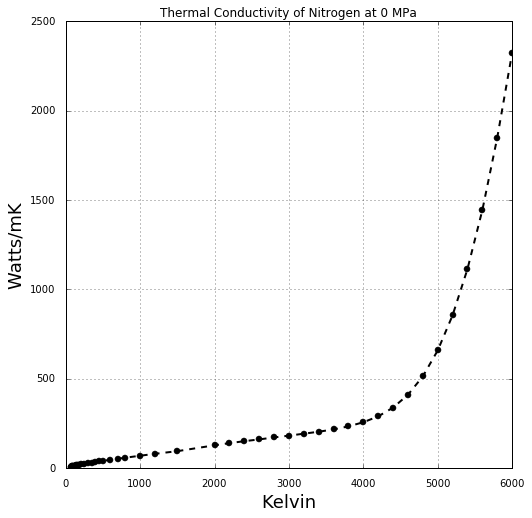

In [8]:
plot(T1[:],k1[:],'Kelvin', 'Watts/mK', 'Thermal Conductivity of Nitrogen at 0 MPa')

### curve fit

In [9]:
AN2 = numpy.vstack([T1**2,T1,numpy.ones(len(T1))]).T
aN2,bN2,cN2 = numpy.linalg.lstsq(AN2,k1)[0]

AN3 = numpy.vstack([T1**3,T1**2,T1,numpy.ones(len(T1))]).T
aN3,bN3,cN3,dN3 = numpy.linalg.lstsq(AN3,k1)[0]

AN4 = numpy.vstack([T1**4,T1**3,T1**2,T1,numpy.ones(len(T1))]).T
aN4,bN4,cN4,dN4,eN4 = numpy.linalg.lstsq(AN4,k1)[0]

In [10]:
#2nd order
kN2 = numpy.zeros_like(T1)
kN2[:] = aN2*(T1[:]**2) + bN2*(T1[:]) + cN2
#3rd order
kN3 = numpy.zeros_like(T1)
kN3[:] = aN3*(T1[:]**3) + bN3*(T1[:]**2) + cN3*T1[:] + dN3
#4th order
kN4 = numpy.zeros_like(T1)
kN4[:] = aN4*(T1[:]**4) + bN4*(T1[:]**3) + cN4*(T1[:]**2) + dN4*T1[:] + eN4

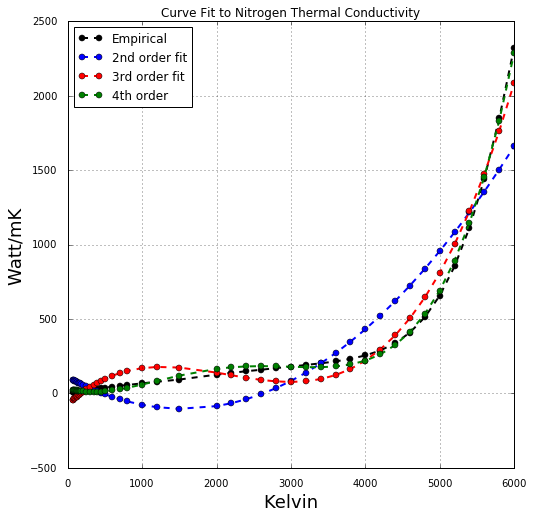

In [11]:
%matplotlib inline
#
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
#
pyplot.xlabel('Kelvin', fontsize=18)
pyplot.ylabel('Watt/mK', fontsize=18)
#
pyplot.tick_params(axis='x', pad=10)
pyplot.tick_params(axis='y', pad=10)
#
#pyplot.xticks(numpy.arange(0, 3000, 200))
#
pyplot.title('Curve Fit to Nitrogen Thermal Conductivity')
#
pyplot.plot(T1,k1,color='k', ls='--', lw=2, marker='o')
pyplot.plot(T1,kN2,color='b',ls='--', lw=2, marker='o')
pyplot.plot(T1,kN3,color='r',ls='--', lw=2, marker='o')
pyplot.plot(T1,kN4,color='g',ls='--', lw=2, marker='o');
pyplot.legend(['Empirical','2nd order fit','3rd order fit','4th order'],loc='upper left');

#### looks like the 4th order fit works well

In [12]:
aN4

1.1973364764750705e-11

In [13]:
bN4

-1.0022238377799794e-07

In [14]:
cN4

0.00025655111953739039

In [15]:
dN4

-0.1423732005907308

In [16]:
eN4

33.464978104210182

## Boron

In [ ]:
#http://www.academia.edu/5198003/
#Correlations_for_the_Thermal_Conductivity_of_Metals_as_a_Function_of_Temperature

In [17]:
kB = 27.4 #W/(m·K)

## Nickel

In [18]:
kNi = 90.9 #W/(m·K)

## Cobalt

In [19]:
kCo = 100 #W/(m·K)

## Tungsten

In [20]:
kT = 173 #W/(m·K)